## I Linear regression

During this practice, we are going to consider a dataset containing grades and chances of admission.

It is available on the Madoc platform (admissiondata.csv).

**1) Load the data, and, using the drop function of pandas library, remove the serial number column.**

Verify that there are no missing values.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# If working with google colab and drive folder, you should use this piece of code
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, explained_variance_score

In [6]:
data = pd.read_csv('admissiondata.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Content**

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

**Acknowledgements**

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.

**Inspiration**

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

**Citation**

Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [7]:
# we drop the serial number column in order to only keep the wanted data
data.drop(labels='Serial No.', axis=1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# we make sure they are not null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [9]:
# We do a random sampling in order to check coherence of values
data.sample(n=10, replace=False)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
405,302,99,3,2.5,3.0,7.45,0,0.52
65,325,112,4,3.5,3.5,8.92,0,0.55
375,304,101,2,2.0,2.5,7.66,0,0.38
18,318,110,3,4.0,3.0,8.80,0,0.63
210,325,108,4,4.5,4.0,9.06,1,0.79
277,320,101,2,2.5,3.0,8.62,0,0.70
141,332,118,2,4.5,3.5,9.36,1,0.90
248,324,110,3,3.5,4.0,8.87,1,0.80
318,324,111,3,2.5,2.0,8.80,1,0.79
305,321,109,3,3.5,3.5,8.80,1,0.74


In [10]:
# Can be compared as the R function : summary(), give all the basic statistics indicators for our dataset
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**2) Using the heatmap function of seaborn library, plot the correlation table of all the features.
What can we observe ?**

In [11]:
# Correlation matrix of the dataset
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Correlation matrix is basically an indicator on how variables (here columns) are related to each other.

Then, each cell of the matrix contains a value between -1 and 1, meaning :
- The more it is near -1 or 1, the more the two variables are related to each other.
- The more it is near of 0, the more the variables can be independent (need to ensure with some more advanced statistcal check)
- The coefficient basically represents the increase/decrease value to link the two variables.

<IPython.core.display.Javascript object>


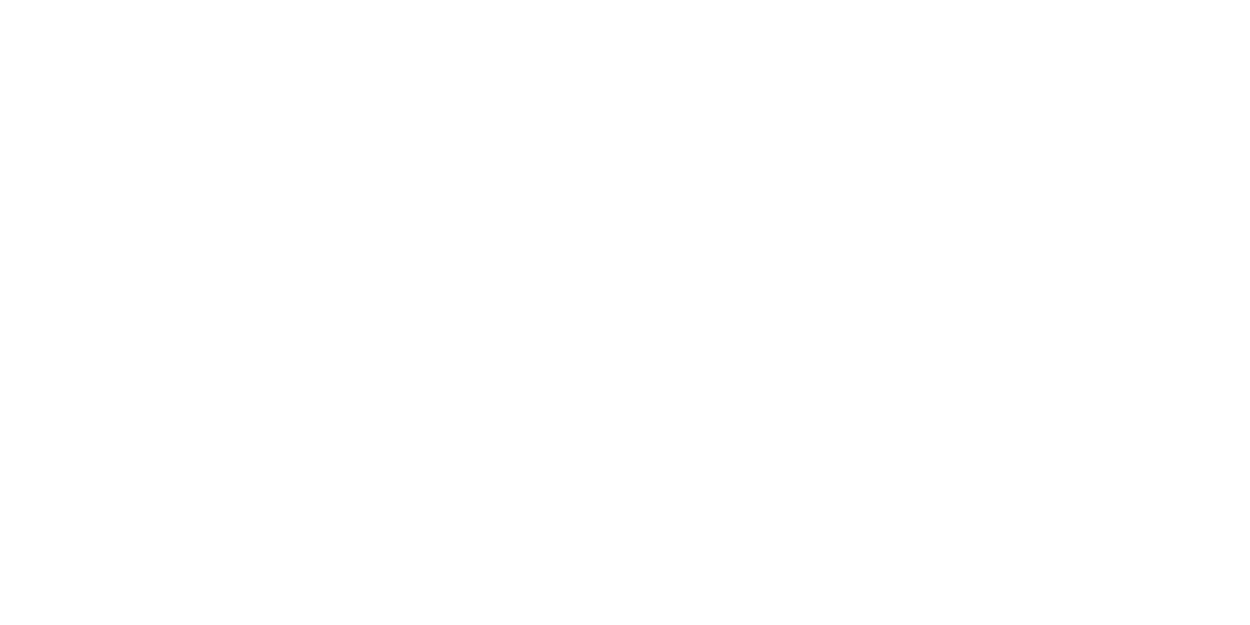

In [12]:
# a better way to see a correlation matrix
plt.figure(figsize=(10, 5))
p = sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True)
plt.show()

**3) We now consider that ’Chances of Admit ’ is the target. Produce a scatter plot of all the features
(individually) as a function the target**

<IPython.core.display.Javascript object>


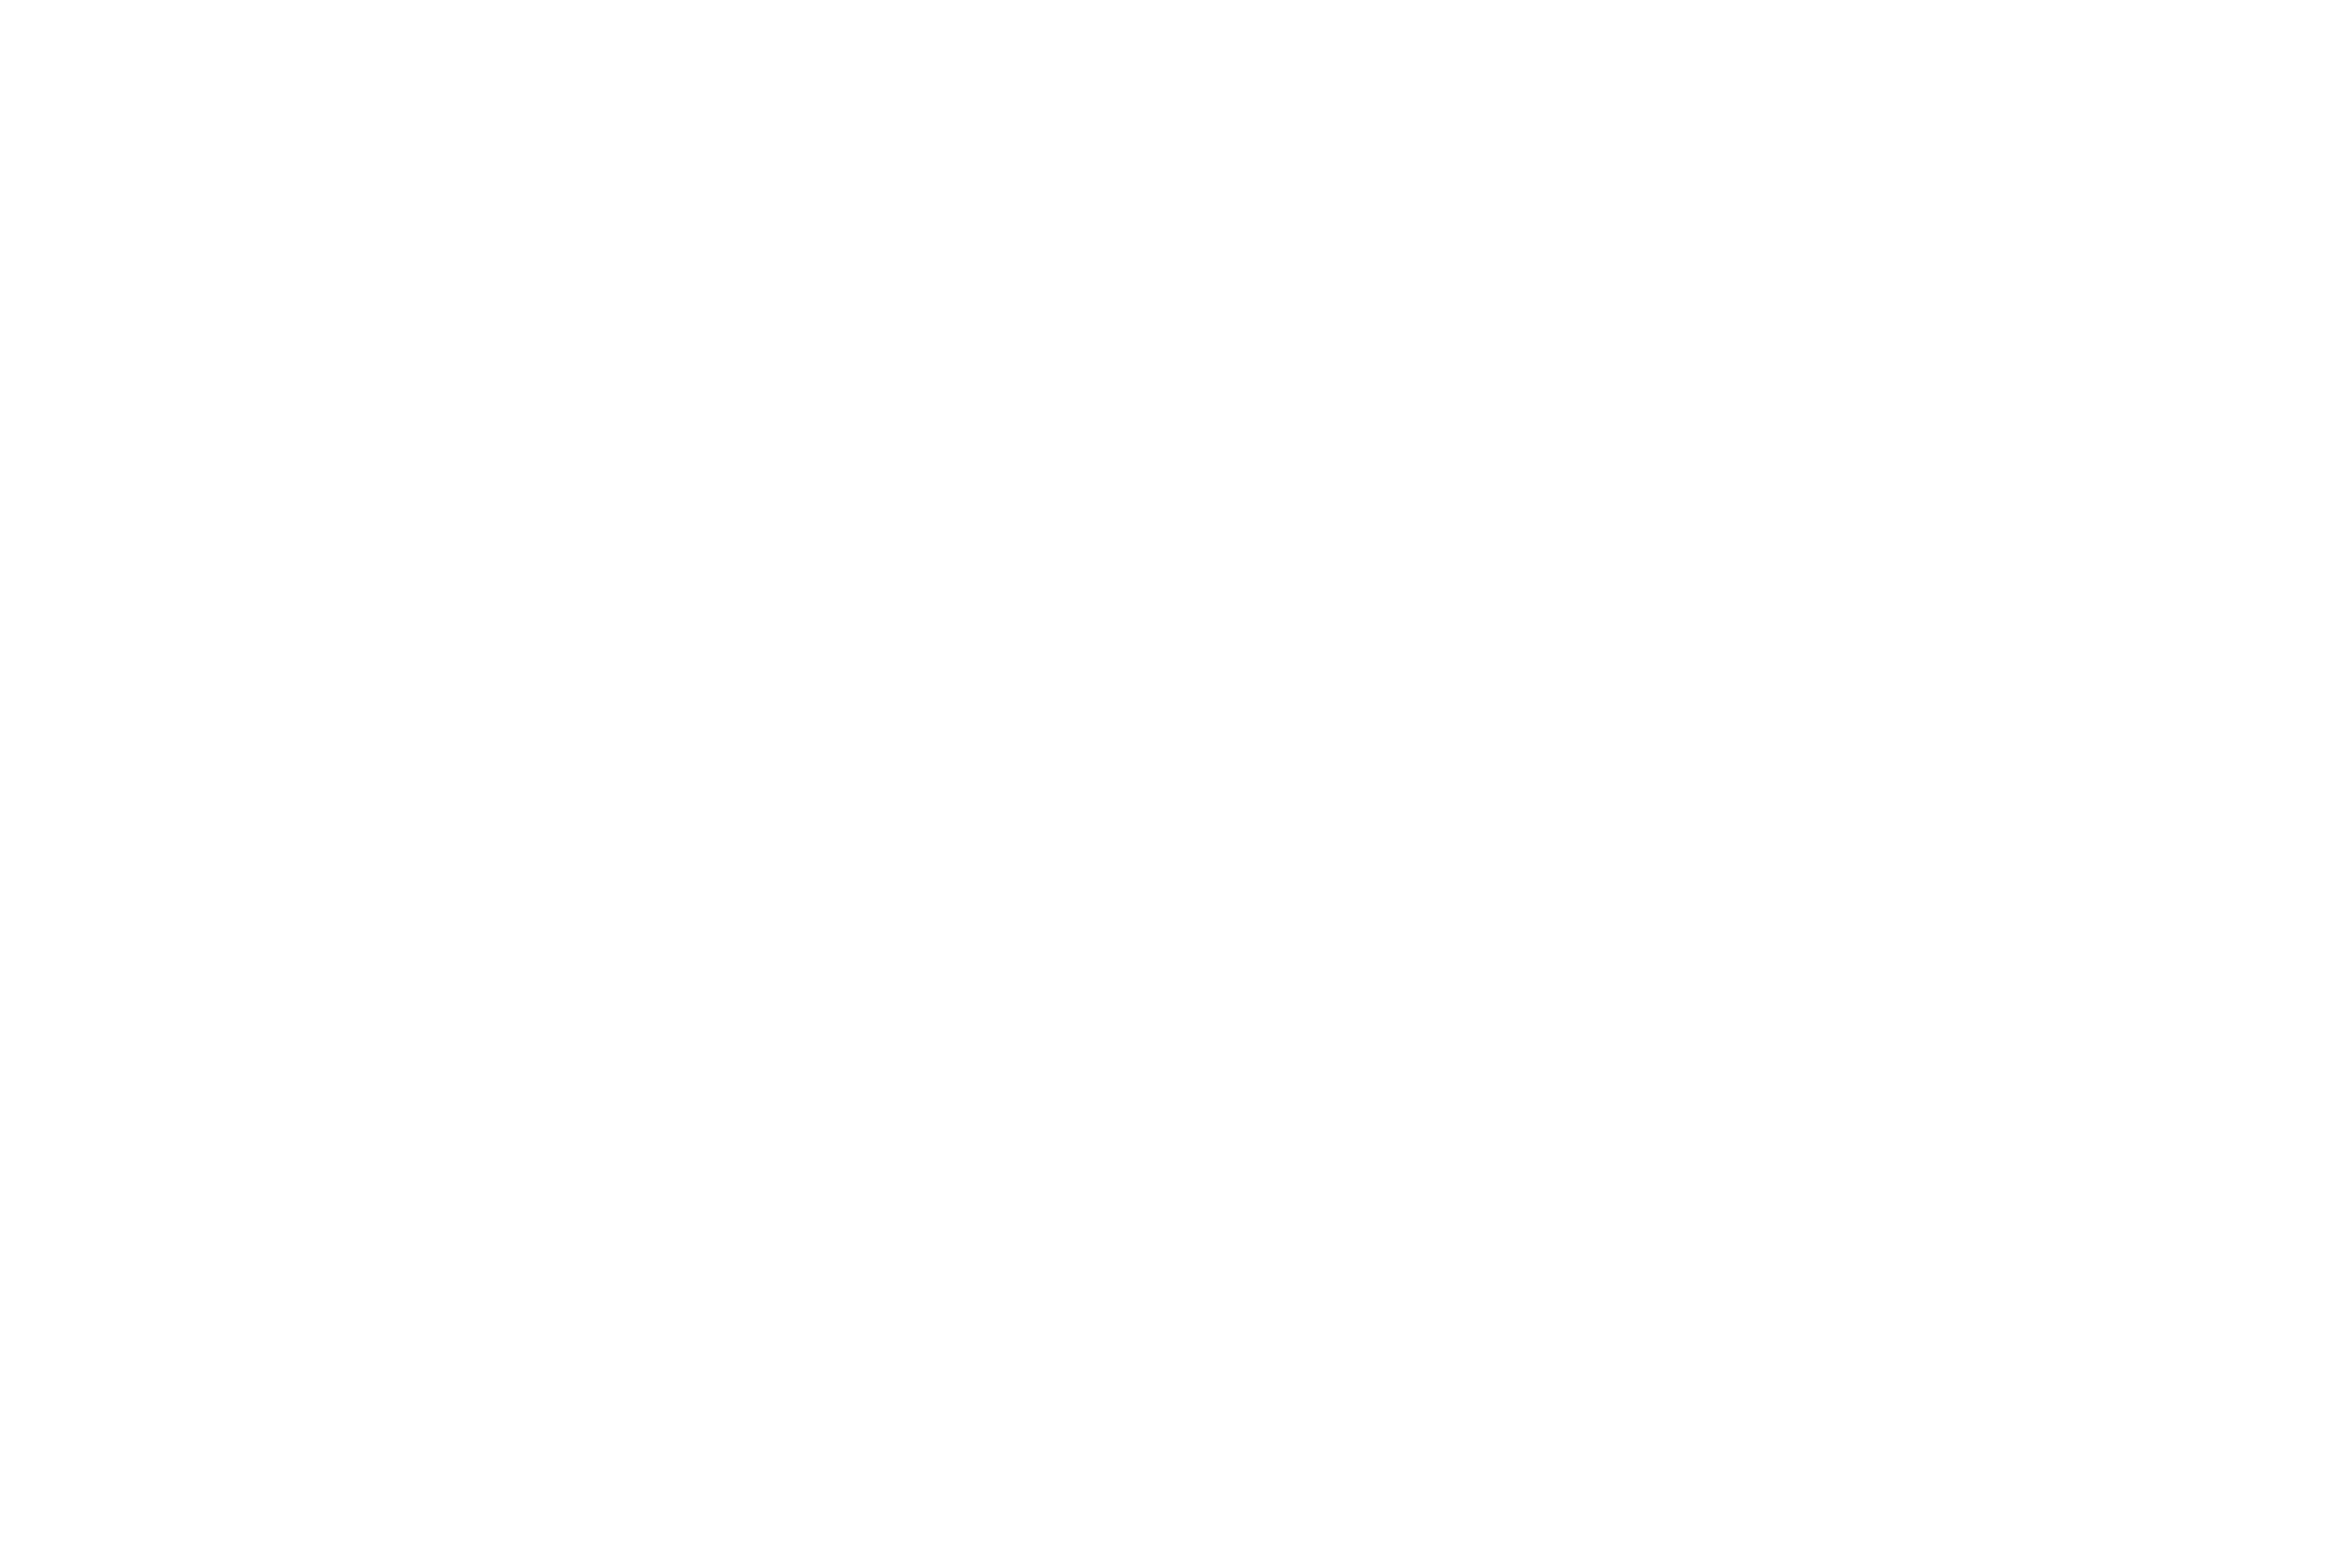

In [13]:
# scatter plot of target as a function of features
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, 7):
    ax = fig.add_subplot(3, 3, i)
    sns.scatterplot(y=data['Chance of Admit '], x= data.iloc[:,i-1])
    plt.ylabel('Chance of Admit')
    plt.xlabel(data.columns[i-1])
plt.show()

**4) Split your data into a training set and a testing set, and then learn a linear model**

In [14]:
X = data.drop(columns='Chance of Admit ')
y = pd.DataFrame(data['Chance of Admit '])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [17]:
y_train.head()

,Chance of Admit
249,0.77
433,0.71
19,0.62
322,0.72
332,0.75


In [18]:
m = LinearRegression()
m.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**5) Using the metrics of regression (see https://scikit-learn.org/stable/modules/classes.html#regression-metrics), evaluate your model. What are the important features ? Is there
any link with the correlation table ?**

In [19]:
prediction = m.predict(X_test)
print('Coefficients: \n', m.coef_)
def evaluation_linearRegression(y_test,prediction):
# The mean squared error
    print("Mean absolute error: %.2f"% mean_absolute_error(y_test, prediction))
    print("Median absolute error: %.2f"% median_absolute_error(y_test, prediction))
    print('Variance score: %.2f' % r2_score(y_test, prediction))
evaluation_linearRegression(y_test,prediction)

Coefficients: 
 [[0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
  0.02402679]]
Mean absolute error: 0.04
Median absolute error: 0.03
Variance score: 0.82


## II Going further ...

The linear regression model is quite model, but already gives satisfying results, for this data. 
Now consider a new dataset, boston houses.

For this dataset, process to same learning workflow, and compare the results with another regression
method : Gradientboostedregression : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html This method has a number of parameters, that you
may change in order to maximize the quality of the metrics.

In [20]:
from sklearn.datasets import load_boston 
dataset = load_boston()
print(dataset.DESCR)
Y = pd.DataFrame(dataset.target)
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X['MEDV'] = pd.Series(list(Y[0]), index=Y.index)
X.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<IPython.core.display.Javascript object>


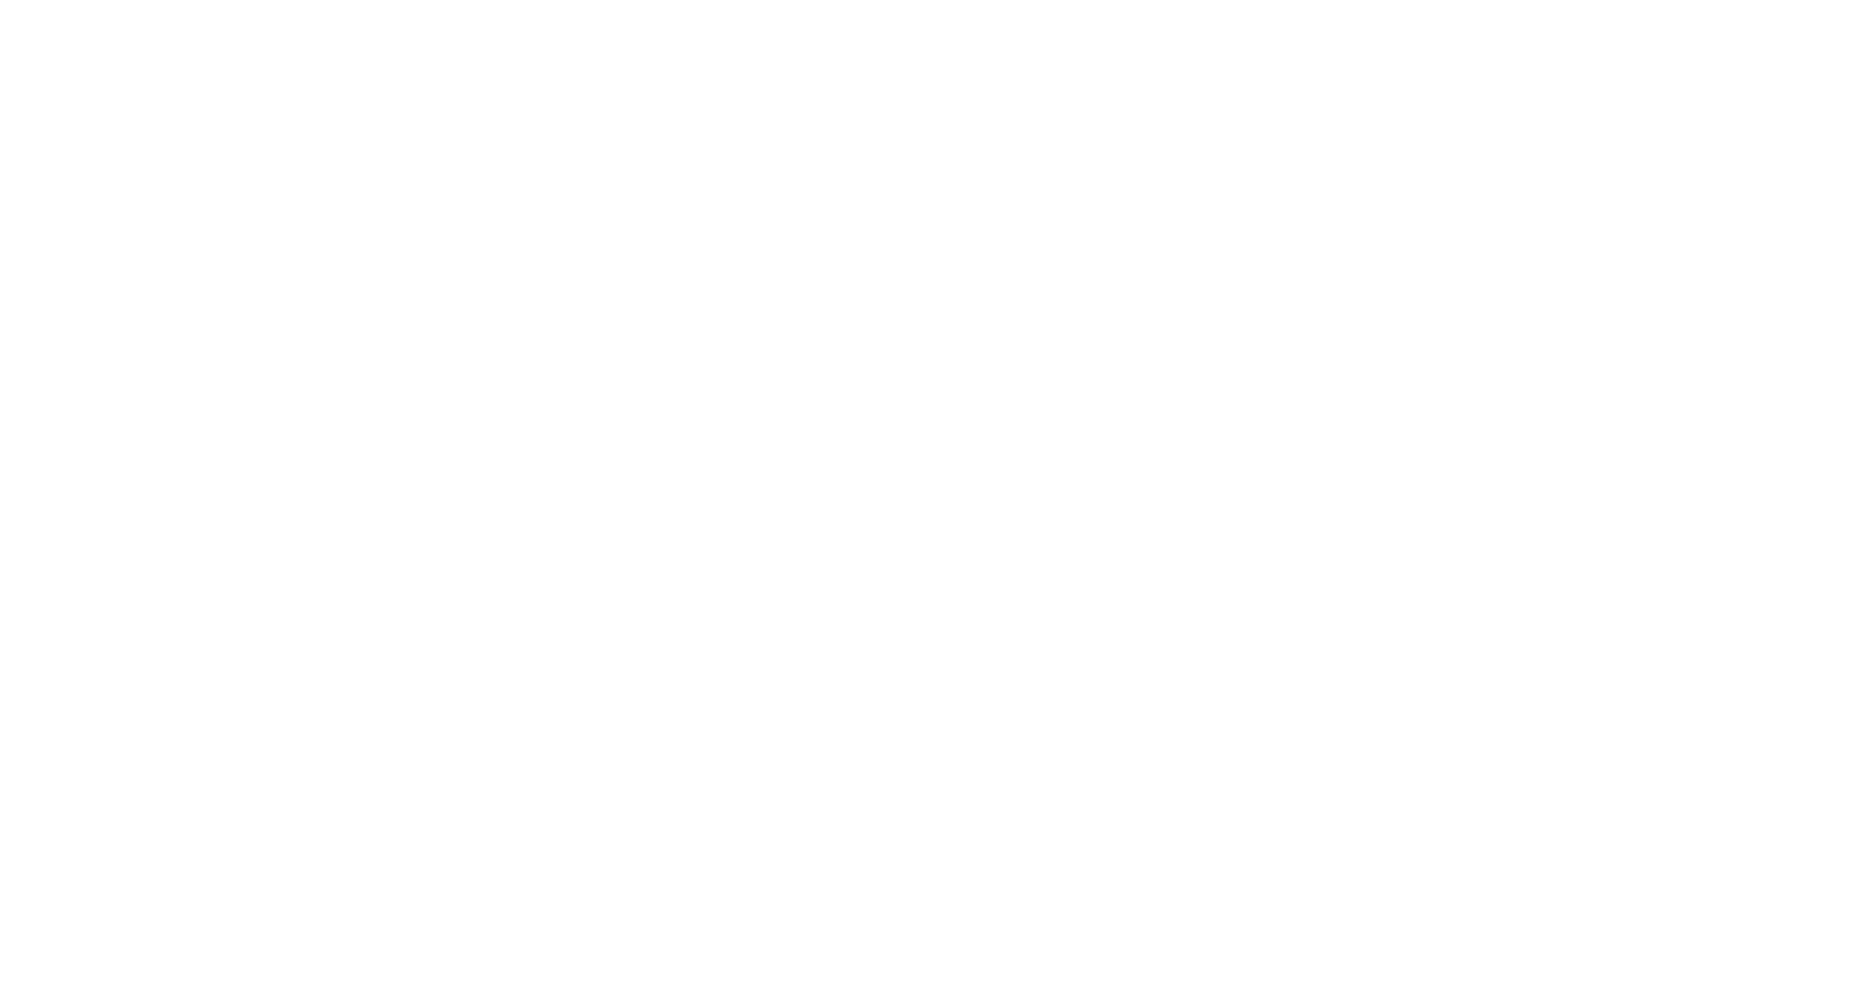

In [21]:
plt.figure(figsize=(15, 8))
p = sns.heatmap(X.corr(), annot=True)
plt.show()

In [22]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


<IPython.core.display.Javascript object>


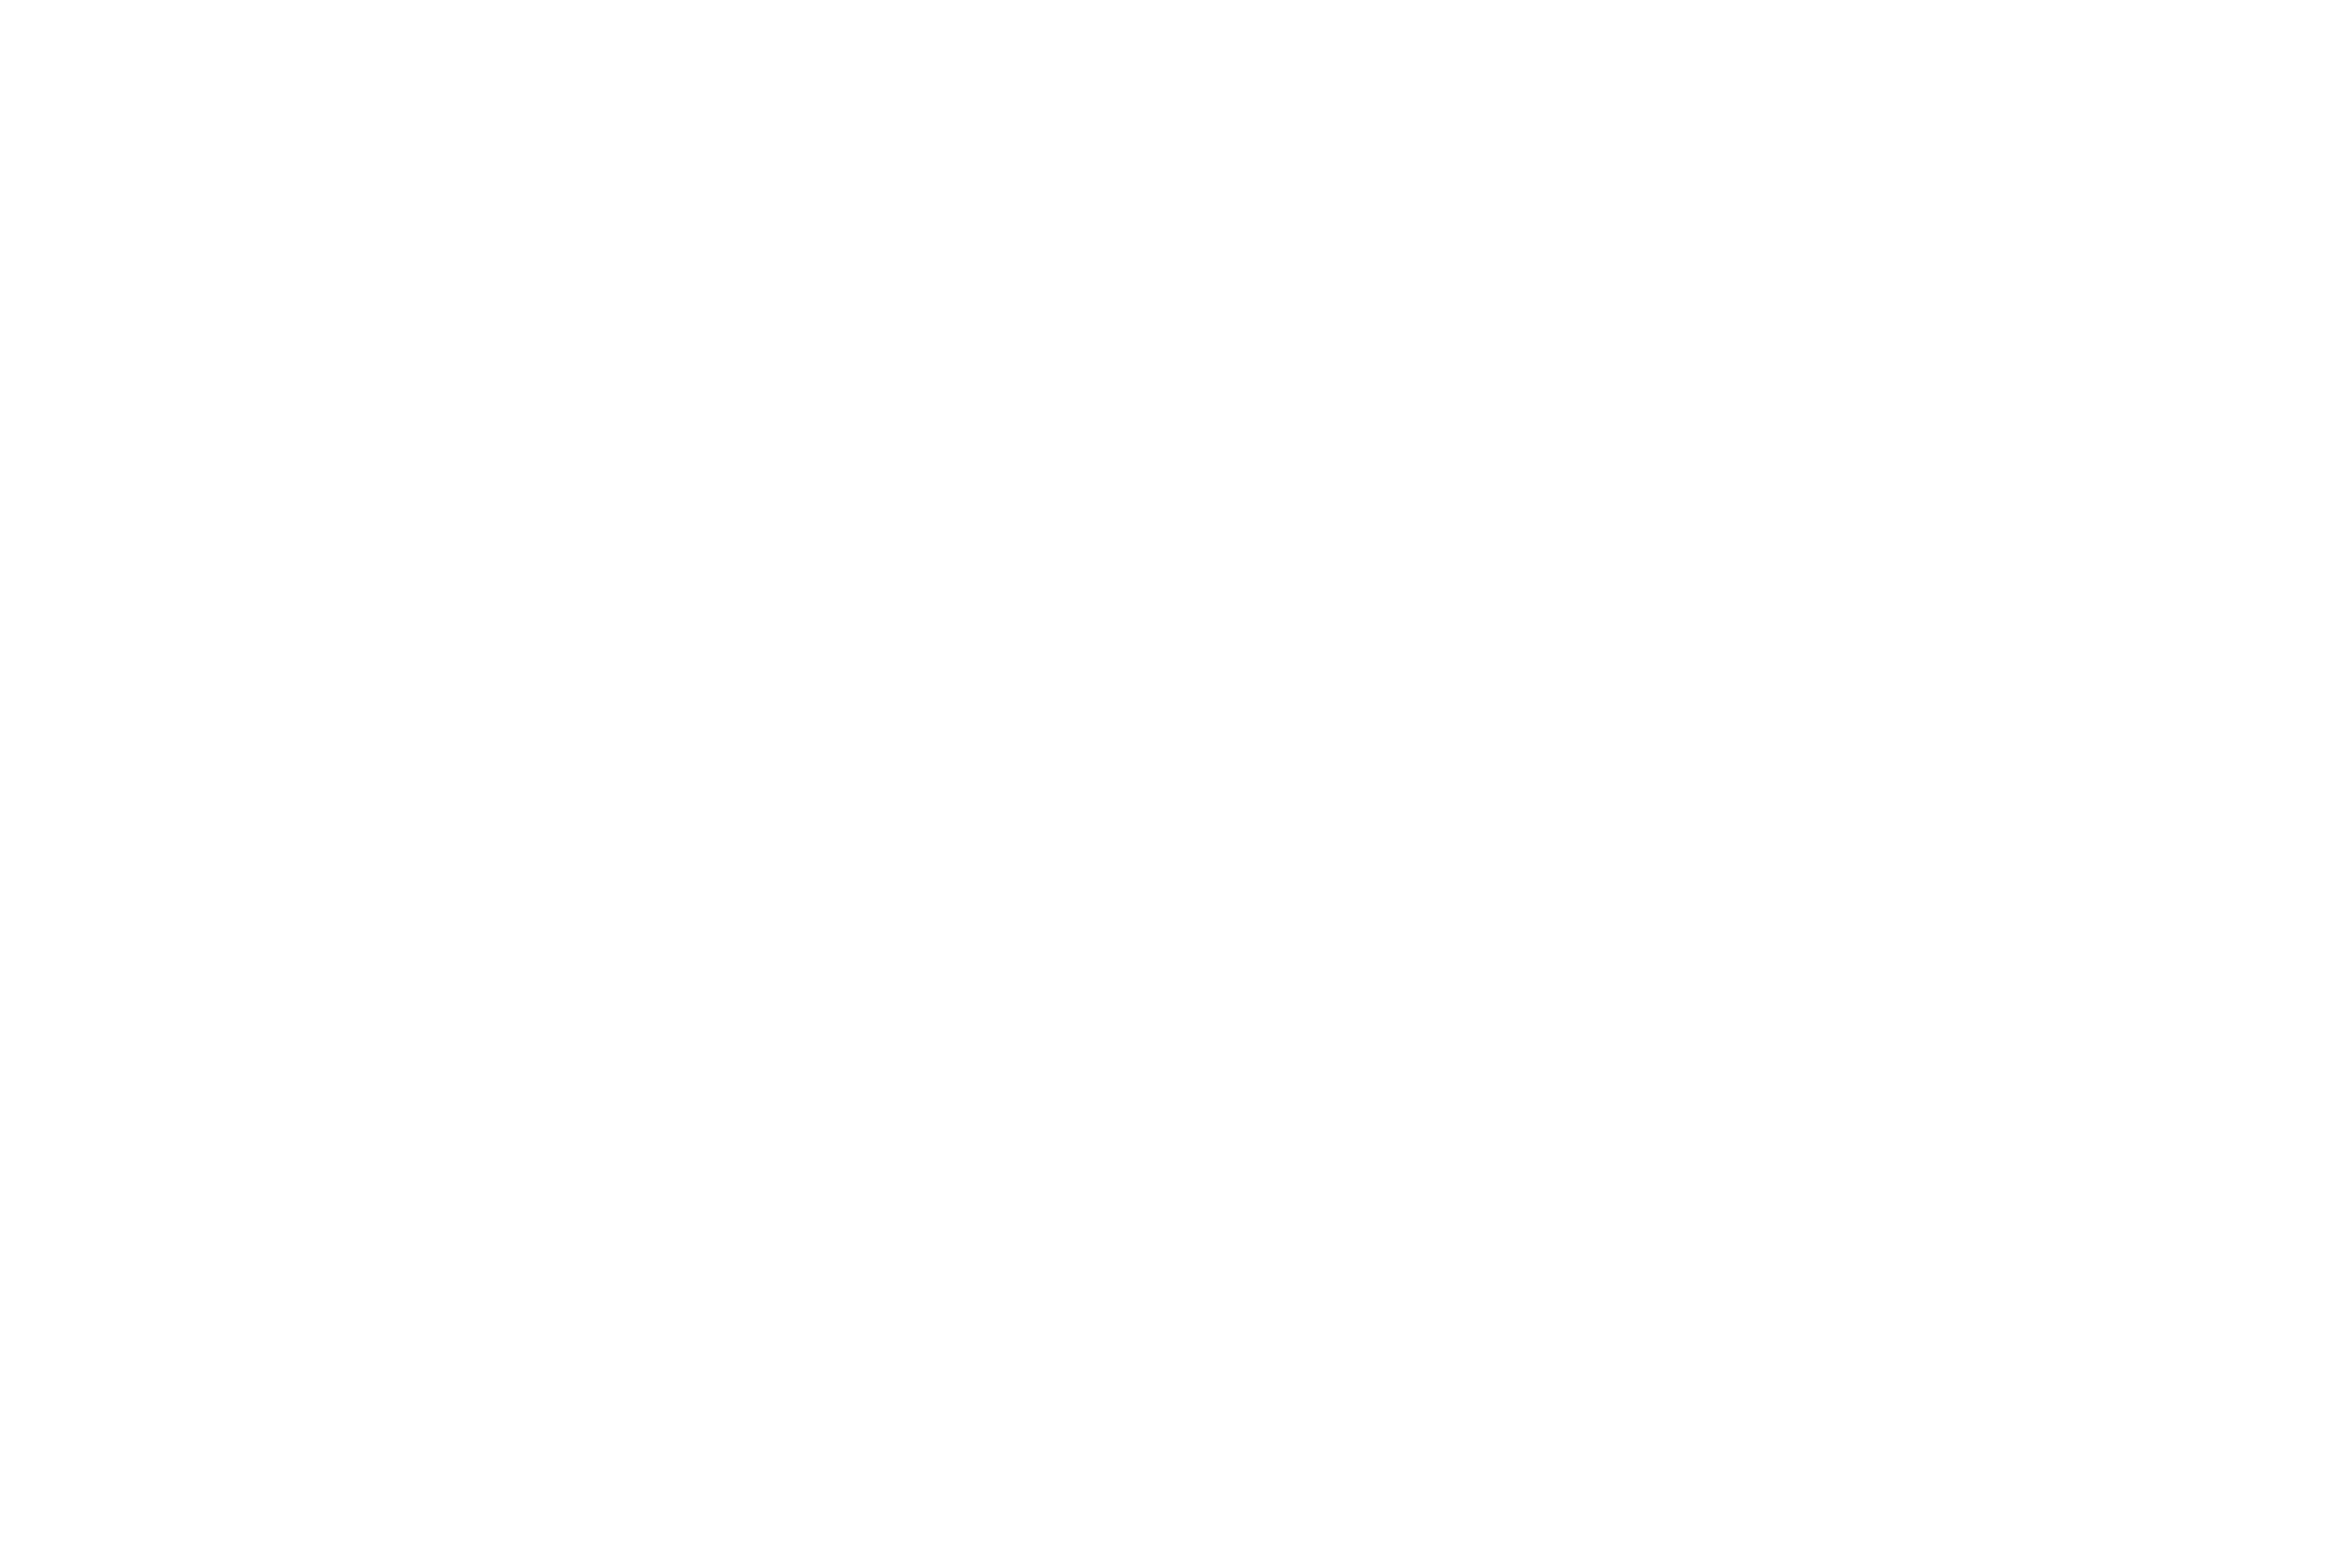

In [24]:
# scatter plot of target as a function of features
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(0, 9):
    ax = fig.add_subplot(3, 3, i+1)
    sns.scatterplot(y=X['MEDV'], x= X.iloc[:,i])
    plt.ylabel('MEDV')
    plt.xlabel(X.columns[i])
plt.show()

<IPython.core.display.Javascript object>


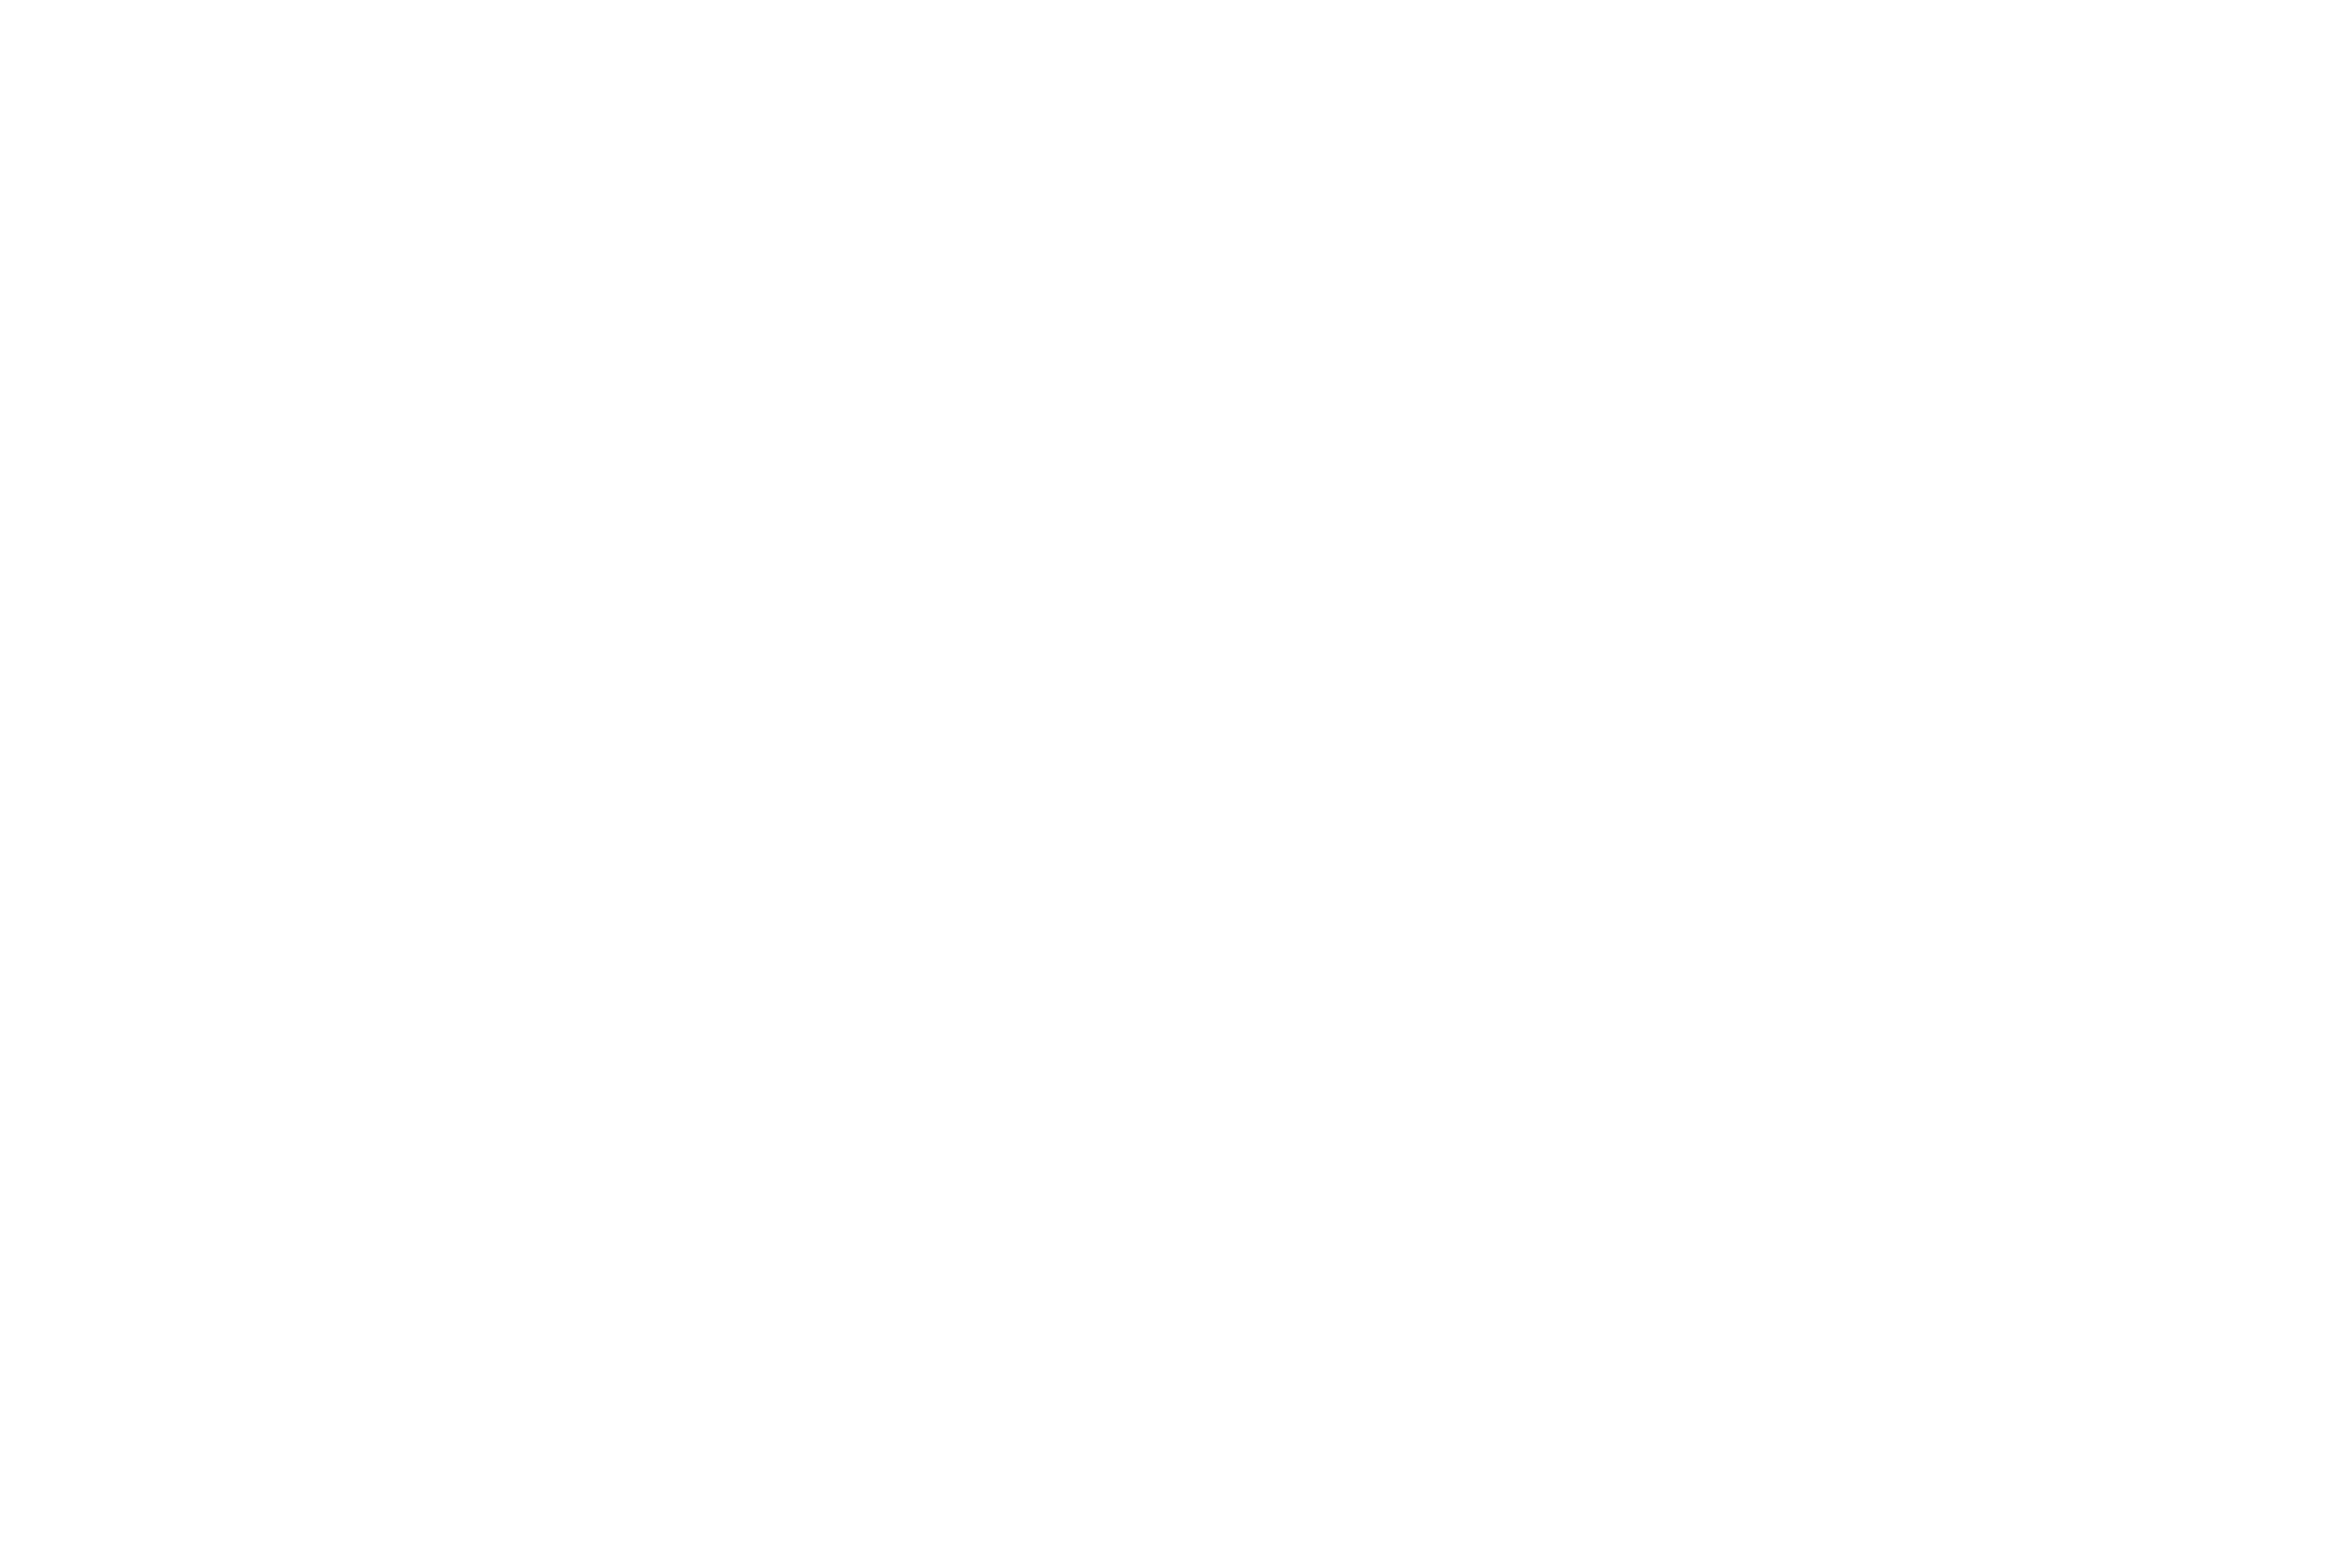

In [25]:
# scatter plot of target as a function of features
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(9, 13):
    ax = fig.add_subplot(3, 3, i%9+1)
    sns.scatterplot(y=X['MEDV'], x= X.iloc[:,i])
    plt.ylabel('MEDV')
    plt.xlabel(X.columns[i])
plt.show()

In [26]:
X = X.drop(columns='MEDV')

In [27]:
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# trying with basic linear regression
m = LinearRegression()
m.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor as gb

In [30]:
model = gb()
model.fit(X_train, list(Y_train[0]))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
def compareModels(model1, model2, y_test):
    df = pd.DataFrame(data={
        "Variance":[r2_score(model1, y_test), r2_score(model2, y_test)],
        "MeanAbsoluteError":[mean_absolute_error(model1, y_test), mean_absolute_error(model2, y_test)],
        "MedianAbsoluteError":[median_absolute_error(model1, y_test), median_absolute_error(model2, y_test)]
    }, index=["LinearRegression", "GradientBoostingRegression"])
    return df

In [32]:
df = compareModels(m.predict(X_test), model.predict(X_test), Y_test)

In [33]:
df.head()

,Variance,MeanAbsoluteError,MedianAbsoluteError
LinearRegression,0.633325,3.189092,2.324332
GradientBoostingRegression,0.893903,1.930487,1.495430


In [38]:
%matplotlib notebook
lr = list(df.loc["LinearRegression"])
gbr = list(df.loc["GradientBoostingRegression"])


plt.figure(figsize=(12,8), dpi=80)
fig, ax = plt.subplots()
fig.tight_layout()
size = 0.35
length = np.arange(len(df.columns))
p1 = ax.bar(length, lr, size, label="LinearRegression")
p2 = ax.bar(length+size, gbr, size, label="GradientBoostingRegression")
ax.set_title('Scores comparison between LinearRegression and GradientBoostingRegression')
ax.xticks(length + size/2, list(df.columns))
ax.legend()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

We can easily see in this plot that the GradientBoostingRegression is way better than the LinearRegression model.

The more the variance is near 1, the better the predictions are.